# Problem Statement

### Context
The education system is running on the traditional approaches and methodologies for more than three decades. Technological advancement with the emergence of the Internet has changed the whole world but the ladder to reach that advancement was not modified. The government has recently framed and approved the new educational policy (NEP-2020) to take forward the education system toward International standards.


### Objective
A survey was done, after the draft National Education Policy 2020 was published in a country, with 577 college teachers. Each of them was asked whether they voted for the ruling party in 2019 or not and whether they are in favor of or against the NEP. Using the survey data, can we say with statistical evidence that voting preference is not independent of opinion on NEP?


### Data Dictionary

The survey dataset contains the following columns

- `college code`: Unique identification code for the college
- `favours NEP`: Is the college teacher in favour of NEP (Yes/No)
- `voted for ruling party`: Did the college teacher vote for the ruling party in 2019? (Yes/No)
- `experience`: Years of experience of the college teacher

# Import libraries

In [1]:
# for manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical analysis
from scipy.stats import chi2_contingency   # For Chi-Square test

# Import dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/kaggle/input/nep-survey/NEP.csv')

# Data Overview and Sanity check

In [3]:
df.head()

,college code,favours NEP,voted for ruling party,experience
0,C3439,Yes,Yes,10
1,C3483,No,No,9
2,C2753,Yes,Yes,9
3,C3242,Yes,Yes,3
4,C2402,No,No,5


In [5]:
df.shape

(577, 4)

The dataset contains 577 rows and 4 columns.

In [10]:
df.isna().sum()

college code              0
favours NEP               0
voted for ruling party    0
experience                0
dtype: int64

There are no missing values in any of the column

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,577.0,5.410745,2.838125,1.0,3.0,5.0,8.0,10.0


# EDA

In [15]:
df['favours NEP'].value_counts()

favours NEP
No     307
Yes    270
Name: count, dtype: int64

In [16]:
df['voted for ruling party'].value_counts()

voted for ruling party
Yes    326
No     251
Name: count, dtype: int64

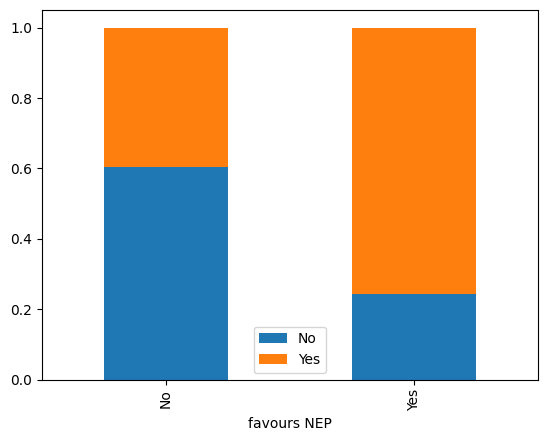

In [17]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['favours NEP'],df['voted for ruling party'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

We can see that the count of people who voted for the ruling party is greater among people who favoured NEP. Let's perform a hypothesis test to check whether we have enough statistical evidence to say that the voting preference is not independent of the opinion on NEP.

# Hypothesis Testing

## Step 1: Define null and alternative hypotheses

$H_0:$ Voting preference is independent of Opinion on NEP

$H_a:$ Voting preference is NOT independent of Opinion on NEP

## Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, favours NEP (in favour of/against the policy) and voting preference (voted/did not vote for ruling party).

## Step 3: Decide the significance level

Here, we select α= 0.05.

## Step 4: Data Preparation

To perform the Chi-squared test of independance we need to create the contingency table. A contingency table is a tabular representation of categorical data. A contingency table shows the number of observations for combinations of values between two categorical variables, say X and Y. Each cell in the contingency table represents a combination of X-Y values.

The pandas [crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function is used to create a contingency table between two categorical variables from a dataframe.

In [18]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['favours NEP'],df['voted for ruling party'])
contingency_table

voted for ruling party,No,Yes
favours NEP,,
No,185,122
Yes,66,204


We have created a two-by-two contingency table, with the counts of 'favours NEP' (Yes or No) in the rows and the counts of 'Voted for ruling party' (Yes or No) in the columns.

## Step 5: Calculate the p-value

In [19]:
# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 9.91379472642833e-18


## Step 6: Compare the p-value with $\alpha$

In [20]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 9.91379472642833e-18 is less than the level of significance, we reject the null hypothesis.


## Step 7:  Conclusion

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that voting preference is NOT independent of opinion on NEP.

### Insight

Voting preference of the college teachers is NOT independent of their opinion on the National Education Policy (NEP). 